In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import sqlite3
from scipy.stats import ttest_ind
import scipy.stats as stats
warnings.filterwarnings('ignore')


### Loading the Dataset

In [2]:
conn = sqlite3.connect('inventory.db')

df= pd.read_sql_query("select * from vendor_sales_summary", conn)
df.head()

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnover,SalestoPurchaseRatio
0,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750.0,86722.0,1402294.74,80203.0,1791117.97,164602.35,147367.20,257032.07,388823.23,21.708410,0.924829,1.277276
1,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,1750.0,42584.0,1118681.68,39984.0,1449045.16,251033.90,73464.92,68601.68,330363.48,22.798701,0.938944,1.295315
2,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750.0,41089.0,952853.91,40951.0,1229626.93,205986.99,75242.09,144929.24,276773.02,22.508699,0.996641,1.290467
3,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,29.99,1750.0,42768.0,936191.52,40198.0,1259244.02,200550.42,73858.47,257032.07,323052.50,25.654480,0.939908,1.345071
4,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,1750.0,51168.0,933304.32,50873.0,1279572.77,177742.45,93473.04,123780.22,346268.45,27.061255,0.994235,1.371013


### Exploratory Data Analysis
In the previous phase, we explored various tables in the database to identify key variables, understand their relationships, and determine which should be included in the final analysis.

In this phase of the EDA process, we will analyze the resultant table to gain insights into the distribution of each column. This analysis will help us understand data patterns, detect anomalies, and assess data quality before proceeding to more advanced analytical steps.

In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
VendorNumber,8093.0,1.016823e+04,17778.345324,2.00,3664.000000,7153.000000,9552.000000,1.733570e+05
Brand,8093.0,1.756037e+04,13022.106706,58.00,5292.000000,17316.000000,24846.000000,9.060900e+04
PurchasePrice,8093.0,2.039558e+01,97.174617,0.38,6.770000,10.230000,18.100000,5.681810e+03
ActualPrice,8093.0,2.997785e+01,131.196533,0.49,10.490000,15.990000,26.990000,7.499990e+03
Volume,8093.0,8.571170e+02,623.433284,50.00,750.000000,750.000000,750.000000,2.000000e+04
TotalPurchaseQuantity,8093.0,1.363080e+03,4383.654938,1.00,24.000000,196.000000,987.000000,1.284980e+05
TotalPurchaseDollars,8093.0,1.257398e+04,43183.516969,0.71,313.320000,2364.180000,10302.210000,1.402295e+06
TotalSalesQuantity,8093.0,1.240981e+03,4047.013650,0.00,27.000000,177.000000,878.000000,1.184740e+05
TotalSalesDollars,8093.0,1.658844e+04,56623.974958,0.00,563.880000,3182.440000,13330.040000,1.791118e+06
TotalSalesPrice,8093.0,7.980325e+03,17456.349722,0.00,248.300000,1761.550000,7971.270000,2.510339e+05


In [4]:
numerical_cols = df.select_dtypes(include=np.number).columns

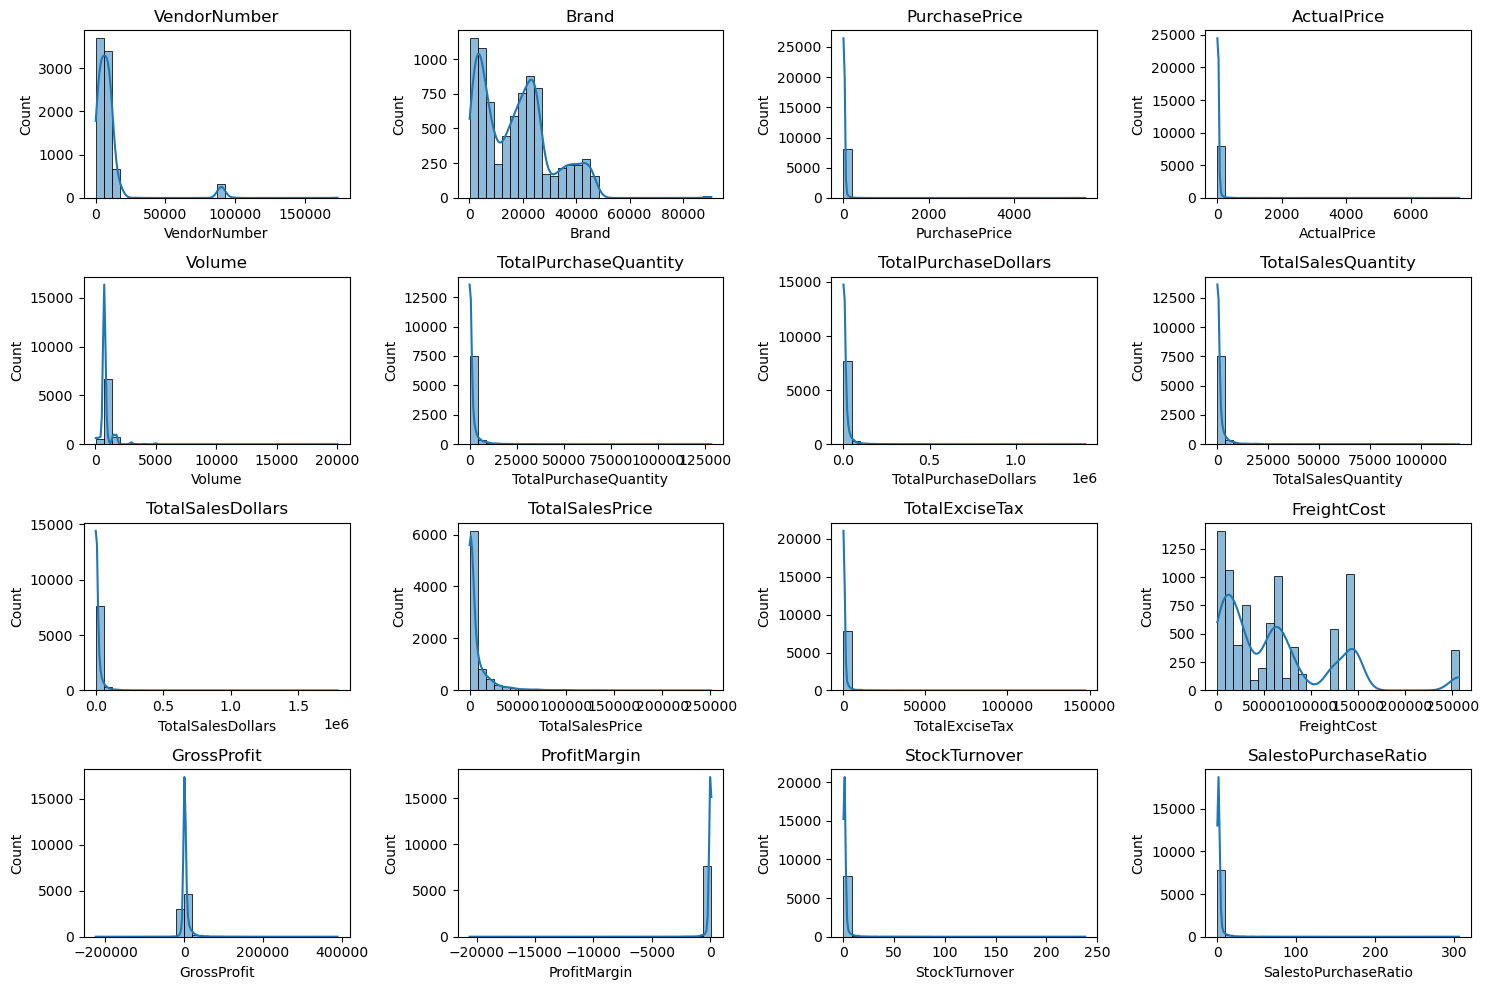

In [5]:
numerical_cols = df.select_dtypes(include=np.number).columns

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(4,4, i+1)
    sns.histplot(df[col],kde=True, bins=30)
    plt.title(col)
plt.tight_layout()
plt.show()


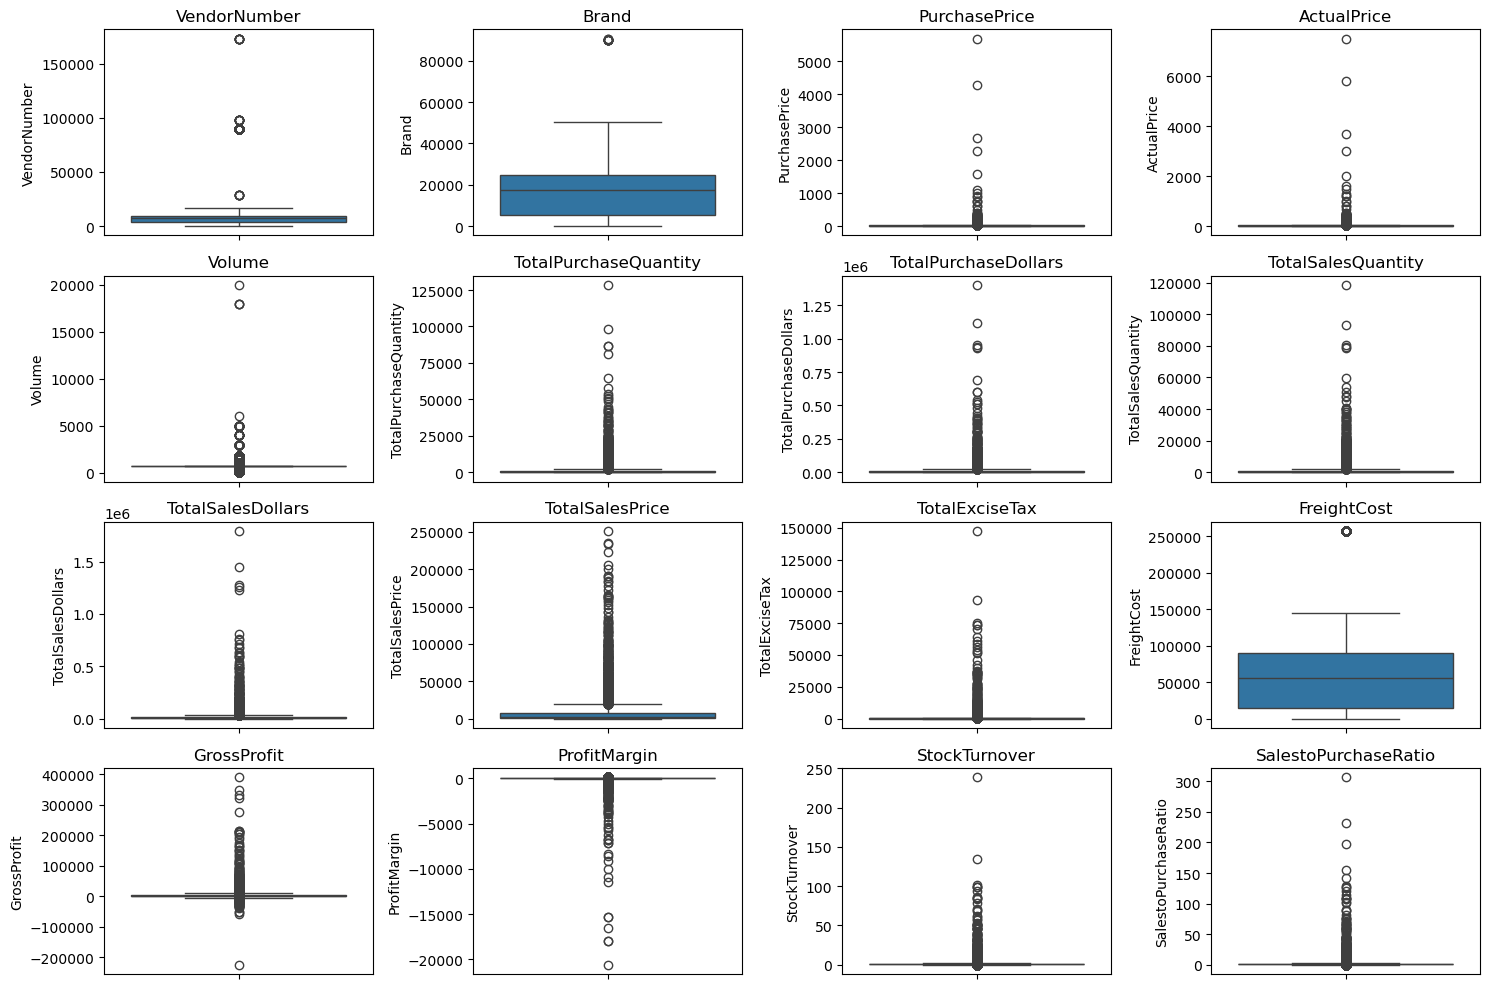

In [6]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols[:16]):
    plt.subplot(4,4, i+1)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()


### SUMMARY STATISTICS INSIGHTS
Negative & Zero Values:
Gross Profit: Minimum value is -52,002.78, indicating losses. Some products or transactions may be selling at a loss due to high costs or selling at discounts lower than the purchase price.

Profit Margin: Has a minimum of -∞, which suggests cases where revenue is zero or even lower than costs.

Total Sales Quantity & Sales Dollars: Minimum values are 0, meaning some products were purchased but never sold. These could be slow-moving or obsolete stock.

Outliers Indicated by High Standard Deviations:
Purchase & Actual Prices: The max values (5,681.81 & 7,499.99) are significantly higher than the mean (24.39 & 35.64), indicating potential premium products.

Freight Cost: Huge variation, from 0.09 to 257,032.07, suggests logistics inefficiencies or bulk shipments.

Stock Turnover: Ranges from 0 to 274.5, implying some products sell extremely fast while others remain in stock indefinitely. Value more than 1 indicates that sold quantity for that product is higher than purchased quantity due to either sales being fulfilled from older stock.


In [7]:
df = pd.read_sql_query("""select *
from vendor_sales_summary
where GrossProfit > 0
and ProfitMargin > 0
and TotalSalesQuantity > 0""", conn)


In [8]:
df

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnover,SalestoPurchaseRatio
0,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750.0,86722.0,1402294.74,80203.0,1791117.97,164602.35,147367.20,257032.07,388823.23,21.708410,0.924829,1.277276
1,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,1750.0,42584.0,1118681.68,39984.0,1449045.16,251033.90,73464.92,68601.68,330363.48,22.798701,0.938944,1.295315
2,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750.0,41089.0,952853.91,40951.0,1229626.93,205986.99,75242.09,144929.24,276773.02,22.508699,0.996641,1.290467
3,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,29.99,1750.0,42768.0,936191.52,40198.0,1259244.02,200550.42,73858.47,257032.07,323052.50,25.654480,0.939908,1.345071
4,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,1750.0,51168.0,933304.32,50873.0,1279572.77,177742.45,93473.04,123780.22,346268.45,27.061255,0.994235,1.371013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6571,8004,SAZERAC CO INC,5683,Dr McGillicuddy's Apple Pie,0.39,0.49,50.0,6.0,2.34,128.0,62.72,0.98,6.72,50293.62,60.38,96.269133,21.333333,26.803419
6572,9815,WINE GROUP INC,22407,Three Wishes Chard,2.25,3.29,750.0,1.0,2.25,1.0,3.29,3.29,0.11,27100.41,1.04,31.610942,1.000000,1.462222
6573,3252,E & J GALLO WINERY,5018,E&J Apple Brandy,0.76,0.99,50.0,2.0,1.52,2.0,1.98,1.98,0.10,61966.91,0.46,23.232323,1.000000,1.302632
6574,3960,DIAGEO NORTH AMERICA INC,3775,Smirnoff Sorbet Pine/Coconut,0.73,0.99,50.0,1.0,0.73,51.0,50.49,18.81,2.64,257032.07,49.76,98.554169,51.000000,69.164384


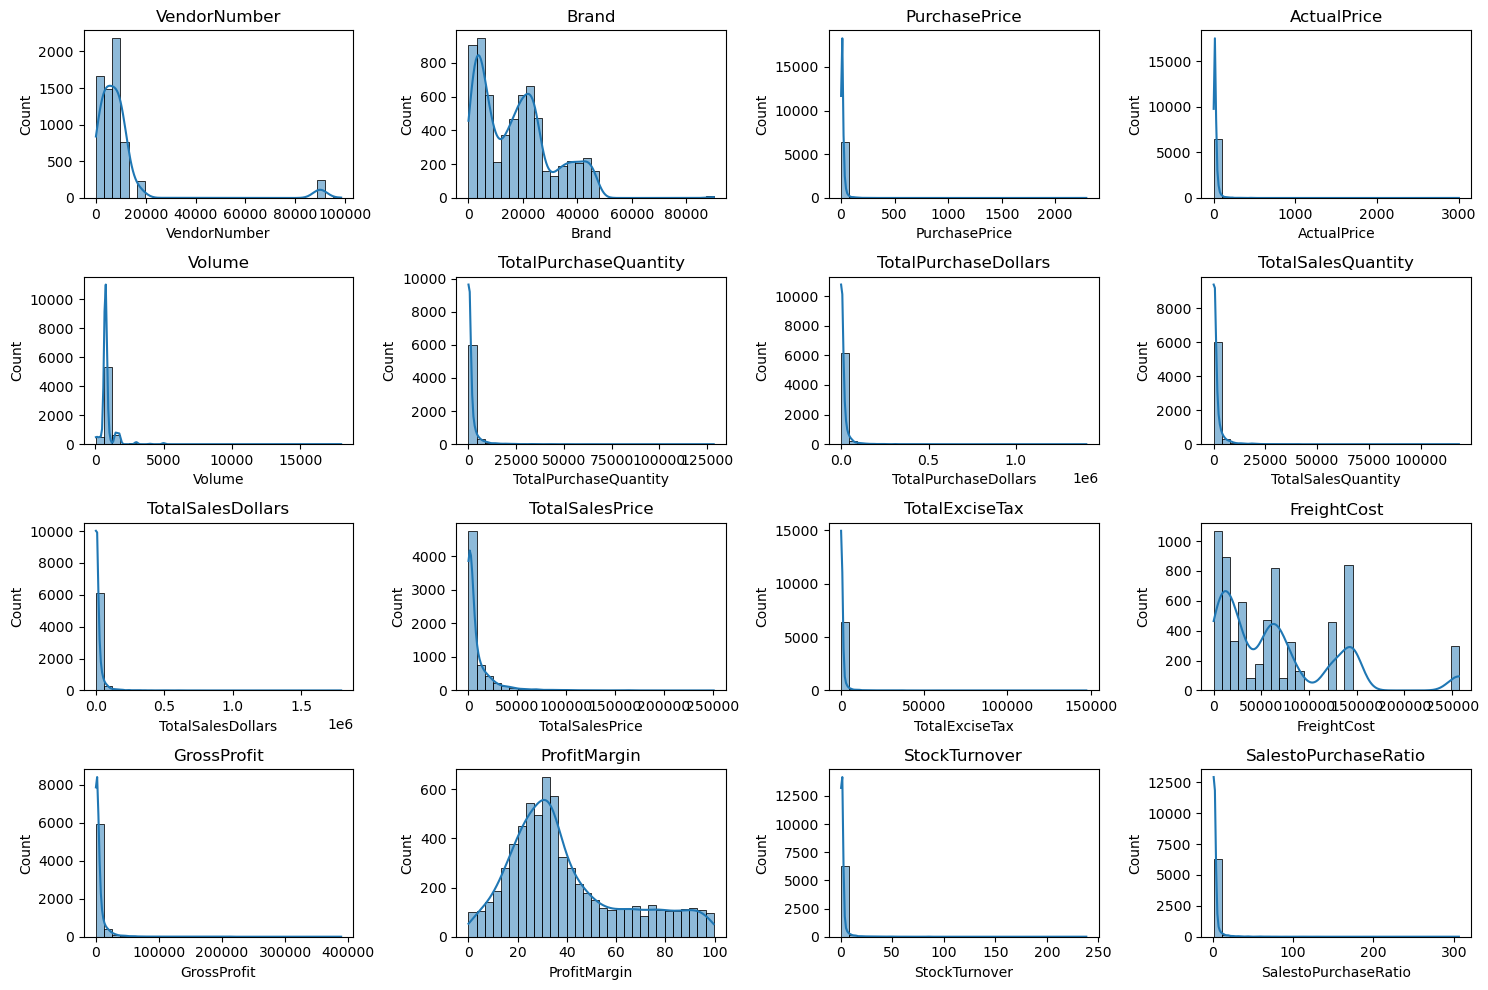

In [9]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(4,4, i+1)
    sns.histplot(df[col],kde=True, bins=30)
    plt.title(col)
plt.tight_layout()
plt.show()

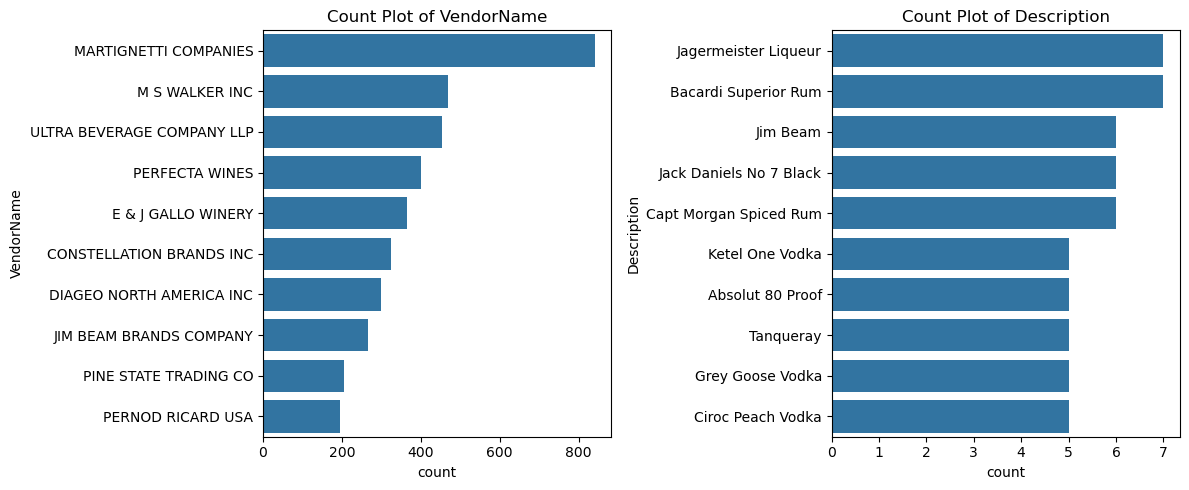

In [10]:
categorical_cols = ["VendorName", "Description"]

plt.figure(figsize=(12, 5))

for i, col in enumerate(categorical_cols):
    plt.subplot(1, 2, i+1)
    sns.countplot(y=df[col], order=df [col].value_counts().index[:10]) # Top 10 categories
    plt.title(f"Count Plot of {col}")
    
plt.tight_layout()
plt.show()

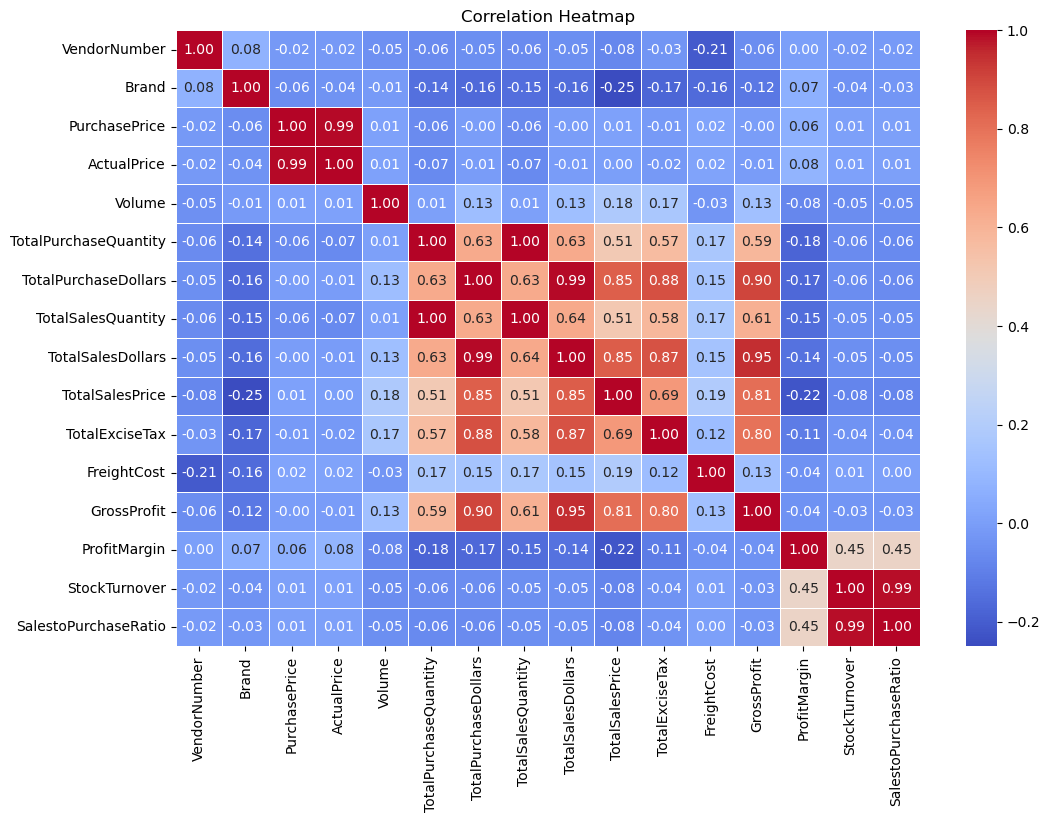

In [11]:
plt.figure(figsize=(12, 8))

correlation_matrix = df[numerical_cols].corr()

sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")

plt.show()

### Correlation Insights

• PurchasePrice has weak correlations with TotalSalesDollars (-0.012) and GrossProfit (-0.016), suggesting that price variations do not significantly impact sales revenue or profit.

Strong correlation between total purchase quantity and total sales quantity (0.999), confirming efficient inventory turnover.

• Negative correlation between profit margin & total sales price (-0.179) suggests that as sales price increases, margins decrease, possibly due to competitive pricing pressures.

StockTurnover has weak negative correlations with both GrossProfit (-0.038) and ProfitMargin (-0.055), indicating that faster turnover does not necessarily result in higher profitability.

## Data Analysis

In [49]:
brand_performance = df.groupby('Description').agg({ 
    'TotalSalesDollars':'sum',
    'ProfitMargin': 'mean'}).reset_index()

In [50]:
low_sales_threshold = brand_performance ['TotalSalesDollars'].quantile (0.15)
high_margin_threshold = brand_performance ['ProfitMargin'].quantile(0.85)

In [51]:
low_sales_threshold

np.float64(412.37999999999994)

In [52]:
high_margin_threshold

np.float64(70.22973811197069)

In [23]:
target_brands = brand_performance[
   (brand_performance ['TotalSalesDollars'] <= low_sales_threshold) &
   (brand_performance ['ProfitMargin']>= high_margin_threshold)
]
print("Brands with Low Sales but High Profit Margins:")
display(target_brands.sort_values('TotalSalesDollars'))

Brands with Low Sales but High Profit Margins:


,Description,TotalSalesDollars,ProfitMargin
1576,Concannon Glen Ellen Wh Zin,15.95,83.448276
4761,Sauza Sprklg Wild Berry Marg,20.97,76.204101
3679,Merry Irish Cream Liqueur,35.97,73.533500
4760,Sauza Sparkling Margarita,41.94,87.172151
5512,Tracia Syrah,44.94,88.495772
...,...,...,...
2382,Galerie Pleinair Cab Svgn NV,399.92,91.775855
4438,Ravenswood Big River Znfdl,401.86,72.960733
827,Byron Santa Barbara Chard,402.15,76.516225
2723,Herzog Kosher Znfdl,409.59,89.980224


In [62]:
brand_performance= brand_performance[brand_performance['TotalSalesDollars']<1000]

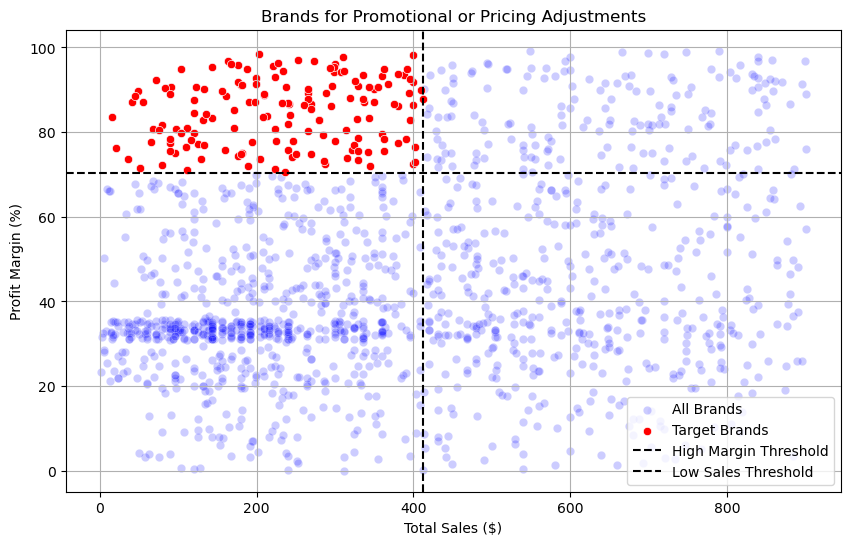

In [63]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=brand_performance, x='TotalSalesDollars', y='ProfitMargin', color="blue", label="All Brands", alpha = 0.2) 
sns.scatterplot(data=target_brands, x='TotalSalesDollars', y='ProfitMargin', color="red", label="Target Brands")

plt.axhline(high_margin_threshold, linestyle='--', color='black', label="High Margin Threshold")
plt.axvline(low_sales_threshold, linestyle='--', color='black', label="Low Sales Threshold")

plt.xlabel("Total Sales ($)")
plt.ylabel("Profit Margin (%)")
plt.title("Brands for Promotional or Pricing Adjustments")
plt.legend()
plt.grid(True)

plt.show()

### Which brand and vendors demonstrate the highest sales performance?

In [67]:
def format_dollars(value): 
    if value >= 1_000_000:
        return f"{value /1_000_000:.2f}M"
    elif value >= 1_000:
        return f"{value / 1_000:.2f}K"
    else:
        return str(value)

In [68]:
top_vendors = df.groupby("VendorName") ["TotalSalesDollars"].sum().nlargest(10)
top_brands = df.groupby("Description") ["TotalSalesDollars"].sum().nlargest(10) 
top_vendors

VendorName
DIAGEO NORTH AMERICA INC      18544635.92
MARTIGNETTI COMPANIES         10994220.98
PERNOD RICARD USA              9295556.81
JIM BEAM BRANDS COMPANY        9105121.04
CONSTELLATION BRANDS INC       7018833.06
BACARDI USA INC                6728020.34
E & J GALLO WINERY             5611261.07
BROWN-FORMAN CORP              5386779.46
ULTRA BEVERAGE COMPANY LLP     4920770.19
M S WALKER INC                 4638173.03
Name: TotalSalesDollars, dtype: float64

In [69]:
top_brands

Description
Capt Morgan Spiced Rum     2394078.38
Jack Daniels No 7 Black    2356996.93
Tito's Handmade Vodka      1890862.95
Absolut 80 Proof           1809084.26
Grey Goose Vodka           1673264.67
Jameson Irish Whiskey      1667217.10
Ketel One Vodka            1524897.83
Baileys Irish Cream        1182760.65
Kahlua                     1145391.53
Jim Beam                   1003055.93
Name: TotalSalesDollars, dtype: float64

In [70]:
top_brands.apply(lambda x : format_dollars(x))

Description
Capt Morgan Spiced Rum     2.39M
Jack Daniels No 7 Black    2.36M
Tito's Handmade Vodka      1.89M
Absolut 80 Proof           1.81M
Grey Goose Vodka           1.67M
Jameson Irish Whiskey      1.67M
Ketel One Vodka            1.52M
Baileys Irish Cream        1.18M
Kahlua                     1.15M
Jim Beam                   1.00M
Name: TotalSalesDollars, dtype: object

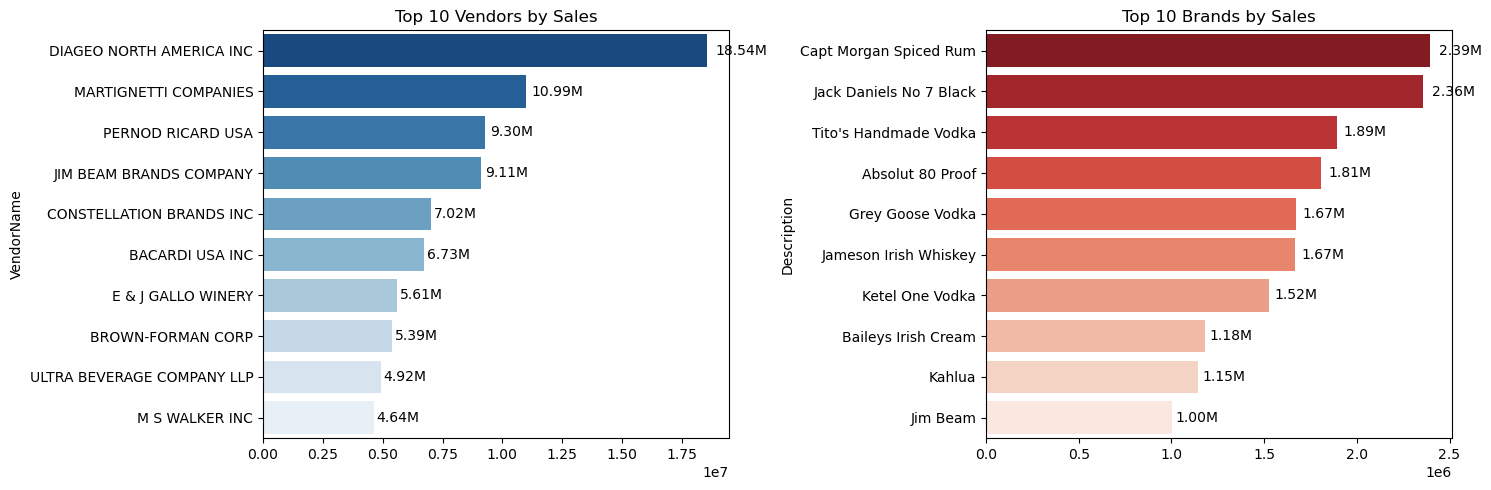

In [71]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
ax1 = sns.barplot(y=top_vendors.index, x=top_vendors.values, palette="Blues_r")
plt.title("Top 10 Vendors by Sales")

for bar in ax1.patches:
    ax1.text(bar.get_width() + (bar.get_width() * 0.02), bar.get_y() + bar.get_height() / 2, format_dollars(bar.get_width()), ha='left', va='center', fontsize=10, color='black')

# Plot for Top Brands
plt.subplot(1, 2, 2)
ax2 = sns.barplot(y=top_brands.index.astype(str), x=top_brands.values, palette="Reds_r") 
plt.title("Top 10 Brands by Sales")

for bar in ax2.patches:
    ax2.text(bar.get_width() + (bar.get_width() * 0.02),
             bar.get_y() + bar.get_height() / 2, 
             format_dollars(bar.get_width()),
             ha='left', va='center', fontsize=10, color='black')

plt.tight_layout()
plt.show()

### Which vendor contribute the most to total purchase dollars?

In [73]:
vendor_performance = df.groupby('VendorName').agg({
    'TotalPurchaseDollars':'sum',
    'GrossProfit':'sum',
    'TotalSalesDollars':'sum'

}).reset_index()

In [80]:
vendor_performance['PurchaseContribution%'] = vendor_performance['TotalPurchaseDollars']/ vendor_performance['TotalPurchaseDollars'].sum()

In [83]:
vendor_performance= round(vendor_performance.sort_values('PurchaseContribution%', ascending= False), 2)

In [84]:
top_vendors = vendor_performance.head(10)
top_vendors ['TotalSalesDollars'] = top_vendors ['TotalSalesDollars'].apply(format_dollars) 
top_vendors ['TotalPurchaseDollars'] = top_vendors ['TotalPurchaseDollars'].apply(format_dollars) 
top_vendors ['GrossProfit'] = top_vendors ['GrossProfit'].apply(format_dollars)
top_vendors

,VendorName,TotalPurchaseDollars,GrossProfit,TotalSalesDollars,PurchaseContribution%
22,DIAGEO NORTH AMERICA INC,14.27M,4.28M,18.54M,0.16
40,JIM BEAM BRANDS COMPANY,6.95M,2.15M,9.11M,0.08
50,MARTIGNETTI COMPANIES,6.76M,4.23M,10.99M,0.08
61,PERNOD RICARD USA,6.73M,2.57M,9.30M,0.07
5,BACARDI USA INC,4.81M,1.92M,6.73M,0.05
17,CONSTELLATION BRANDS INC,4.72M,2.30M,7.02M,0.05
10,BROWN-FORMAN CORP,4.20M,1.19M,5.39M,0.05
27,E & J GALLO WINERY,3.99M,1.62M,5.61M,0.04
96,ULTRA BEVERAGE COMPANY LLP,3.40M,1.52M,4.92M,0.04
72,SAZERAC CO INC,3.07M,786.65K,3.85M,0.03


In [85]:
top_vendors['PurchaseContribution%'].sum()

np.float64(0.6500000000000001)

In [100]:
top_vendors['Cumulative_Contribution%'] = top_vendors['PurchaseContribution%'].cumsum() 
top_vendors

,VendorName,TotalPurchaseDollars,GrossProfit,TotalSalesDollars,PurchaseContribution%,Cumulative_Contribution%
22,DIAGEO NORTH AMERICA INC,14.27M,4.28M,18.54M,0.16,0.16
40,JIM BEAM BRANDS COMPANY,6.95M,2.15M,9.11M,0.08,0.24
50,MARTIGNETTI COMPANIES,6.76M,4.23M,10.99M,0.08,0.32
61,PERNOD RICARD USA,6.73M,2.57M,9.30M,0.07,0.39
5,BACARDI USA INC,4.81M,1.92M,6.73M,0.05,0.44
17,CONSTELLATION BRANDS INC,4.72M,2.30M,7.02M,0.05,0.49
10,BROWN-FORMAN CORP,4.20M,1.19M,5.39M,0.05,0.54
27,E & J GALLO WINERY,3.99M,1.62M,5.61M,0.04,0.58
96,ULTRA BEVERAGE COMPANY LLP,3.40M,1.52M,4.92M,0.04,0.62
72,SAZERAC CO INC,3.07M,786.65K,3.85M,0.03,0.65


In [106]:
# Multiply both columns by 100 for percentage values
top_vendors['PurchaseContribution%'] = top_vendors['PurchaseContribution%'] * 100
top_vendors['Cumulative_Contribution%'] = top_vendors['Cumulative_Contribution%'] * 100


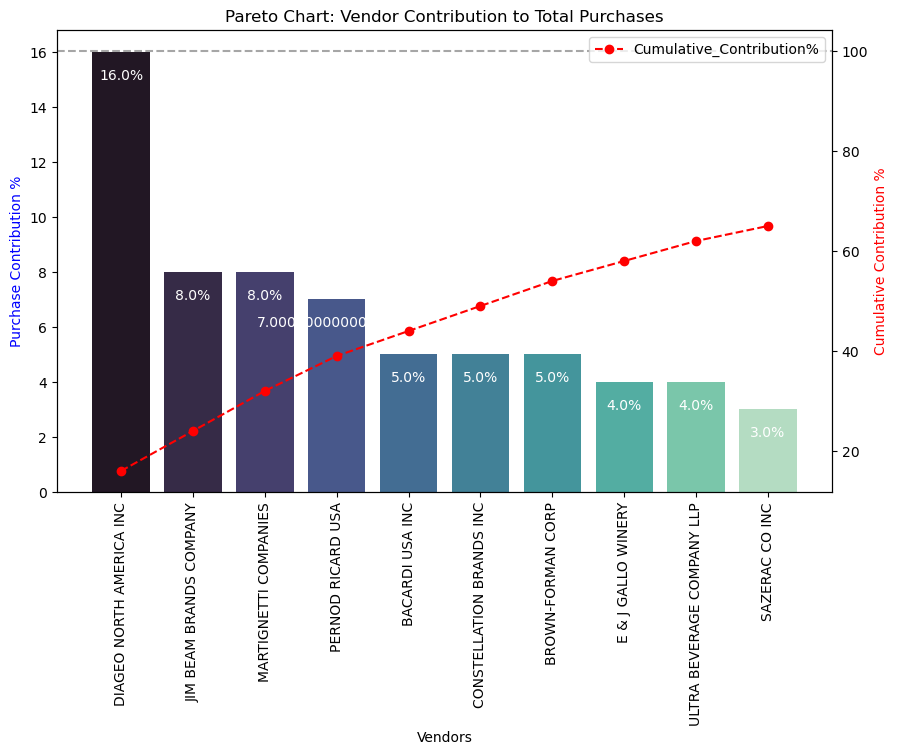

In [108]:
fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar plot for Purchase Contribution%

sns.barplot(x=top_vendors ['VendorName'], y=top_vendors ['PurchaseContribution%'], palette="mako", ax=ax1)

for i, value in enumerate(top_vendors ['PurchaseContribution%']):
    ax1.text(i, value - 1, str(value)+'%', ha='center', fontsize=10, color='white')

# Line Plot for Cumulative Contribution%

ax2 = ax1.twinx()
ax2.plot(top_vendors['VendorName'], top_vendors['Cumulative_Contribution%'], color='red', marker='o', linestyle='dashed',label= 'Cumulative_Contribution%')

ax1.set_xticklabels(top_vendors ['VendorName'], rotation=90)
ax1.set_ylabel('Purchase Contribution %', color='blue')
ax2. set_ylabel('Cumulative Contribution %', color='red')
ax1.set_xlabel('Vendors')
ax1.set_title('Pareto Chart: Vendor Contribution to Total Purchases')

ax2.axhline(y=100, color='gray', linestyle='dashed', alpha=0.7) 
ax2.legend(loc='upper right')

plt.show()

### How much of total procurement is dependent on the top vendors?

In [110]:
print(f"Total Purchase Contribution of top 10 vendors is {round(top_vendors ['PurchaseContribution%'].sum(), 2)} %")

Total Purchase Contribution of top 10 vendors is 65.0 %


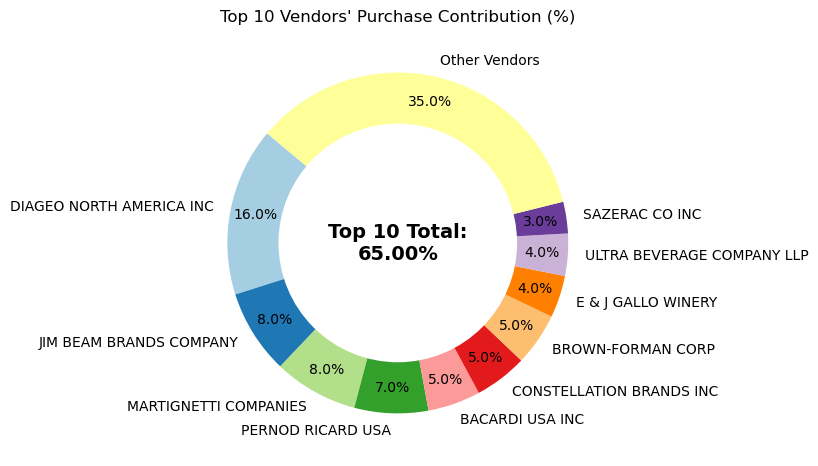

In [115]:
import matplotlib.pyplot as plt

vendors = list(top_vendors['VendorName'].values)
purchase_contributions = list(top_vendors['PurchaseContribution%'].values)

# Ensure they are numeric
purchase_contributions = [float(x) for x in purchase_contributions]

# Calculate total and remainder
total_contribution = sum(purchase_contributions)
remaining_contribution = 100 - total_contribution

# Append "Other Vendors" category
vendors.append("Other Vendors")
purchase_contributions.append(remaining_contribution)

# Donut Chart
fig, ax = plt.subplots(figsize=(8, 8))
wedges, texts, autotexts = ax.pie(
    purchase_contributions,
    labels=vendors,
    autopct='%1.1f%%',
    startangle=140,
    pctdistance=0.85,
    colors=plt.cm.Paired.colors
)

# ✅ Donut hole (the part that broke in your code)
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig.gca().add_artist(centre_circle)

# Center text showing total contribution
plt.text(0, 0, f"Top 10 Total:\n{total_contribution:.2f}%", fontsize=14, fontweight='bold', ha='center', va='center')

plt.title("Top 10 Vendors' Purchase Contribution (%)")
plt.tight_layout()
plt.show()


### Does puchasing in bulk reduce the unit price, and what is the optimal puchase volume for cost savings

In [116]:
df['UnitPurchasePrice']  = df['TotalPurchaseDollars'] / df['TotalPurchaseQuantity']

In [117]:
df ["OrderSize"] = pd.qcut(df ["TotalPurchaseQuantity"], q=3, labels=["Small", "Medium", "Large"])

In [121]:
df.groupby('OrderSize')[['UnitPurchasePrice']].mean()

,UnitPurchasePrice
OrderSize,
Small,26.547089
Medium,14.366364
Large,9.921068


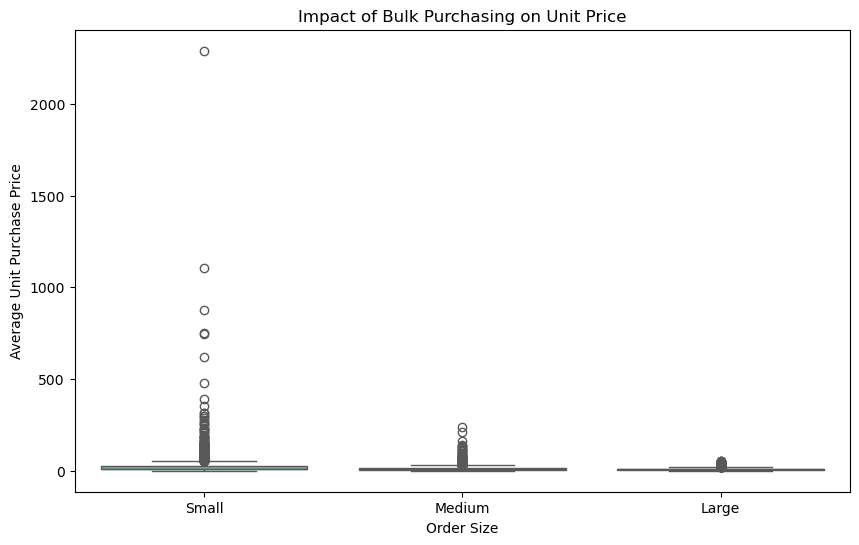

In [122]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="OrderSize", y="UnitPurchasePrice", palette="Set2")
plt.title("Impact of Bulk Purchasing on Unit Price")
plt.xlabel("Order Size")
plt.ylabel("Average Unit Purchase Price")
plt.show()


###
Vendors buying in bulk (Large Order Size) get the lowest unit piice ($10.78 per unit), meaning higher margins if they can manage inventory efficiently.

The price difference between Small and Large orders is substantial (~72% reduction in unit cost) This suggests that bulk pricing strategies successfully encourage vendors to purchase in larger volumes, leading to higher overall sales despite lower per-unit revenue.

### Which vendors have low inventory turnover, indicating excess stock and slow-moving products?

In [127]:
df[df['StockTurnover']<1].groupby('VendorName') [['StockTurnover']].mean().sort_values('StockTurnover' , ascending= True).head(10)

,StockTurnover
VendorName,
SWEET BABY VINEYARD,0.729071
BLACK PRINCE DISTILLERY INC,0.734848
THE PIERPONT GROUP LLC,0.736111
APPOLO VINEYARDS LLC,0.750000
BLACK ROCK SPIRITS LLC,0.750000
THE IMPORTED GRAPE LLC,0.779109
INCREDIBREW INC,0.784806
WALPOLE MTN VIEW WINERY,0.785239
FORTUNE WINE BROKERS LLC,0.797493


### How much capital is locked in unsold inventory per value, and which vendors contribute the most of it?

In [128]:
df ["UnsoldInventoryValue"] = (df ["TotalPurchaseQuantity"] - df ["TotalSalesQuantity"]) * df ["PurchasePrice"] 
print('Total Unsold Capital:', format_dollars(df ["UnsoldInventoryValue"].sum()))

Total Unsold Capital: 4.24M


In [129]:
inventory_value_per_vendor = df.groupby("VendorName") ["UnsoldInventoryValue"].sum().reset_index()

inventory_value_per_vendor = inventory_value_per_vendor.sort_values (by="UnsoldInventoryValue", ascending=False)
inventory_value_per_vendor['UnsoldInventoryValue'] = inventory_value_per_vendor ['UnsoldInventoryValue'].apply(format_dollars)
inventory_value_per_vendor.head(10)

,VendorName,UnsoldInventoryValue
22,DIAGEO NORTH AMERICA INC,991.12K
17,CONSTELLATION BRANDS INC,435.37K
27,E & J GALLO WINERY,429.24K
10,BROWN-FORMAN CORP,385.60K
40,JIM BEAM BRANDS COMPANY,385.45K
72,SAZERAC CO INC,287.99K
67,PROXIMO SPIRITS INC.,277.78K
5,BACARDI USA INC,261.32K
11,CAMPARI AMERICA,115.23K
80,SOUTHERN WINE & SPIRITS NE,106.97K


### What is the 95% confidence intervals for profit margins of top performing and low performing vendors.

In [130]:
top_threshold = df ["TotalSalesDollars"].quantile(0.75)
low_threshold = df ["TotalSalesDollars"].quantile(0.25)


In [131]:
top_vendors = df [df ["TotalSalesDollars"] >= top_threshold]["ProfitMargin"].dropna()
low_vendors = df [df ["TotalSalesDollars"] <= low_threshold]["ProfitMargin"].dropna()



In [132]:
top_vendors

0       21.708410
1       22.798701
2       22.508699
3       25.654480
4       27.061255
          ...    
3871    93.066011
4030    93.879061
4245    96.372575
4279    96.881813
4293    97.681213
Name: ProfitMargin, Length: 1644, dtype: float64

In [136]:
def confidence_interval(data, confidence=0.95):
    mean_val = np.mean(data)
    std_err = np.std(data, ddof=1) / np.sqrt(len(data)) 
    t_critical = stats.t.ppf((1+ confidence) / 2, df=len(data) - 1)
    margin_of_error = t_critical * std_err 
    return mean_val, mean_val - margin_of_error, mean_val + margin_of_error

Top Vendors 95% CI: (28.23, 29.69), Mean: 28.96
Low Vendors 95% CI: (45.05, 47.46), Mean: 46.25


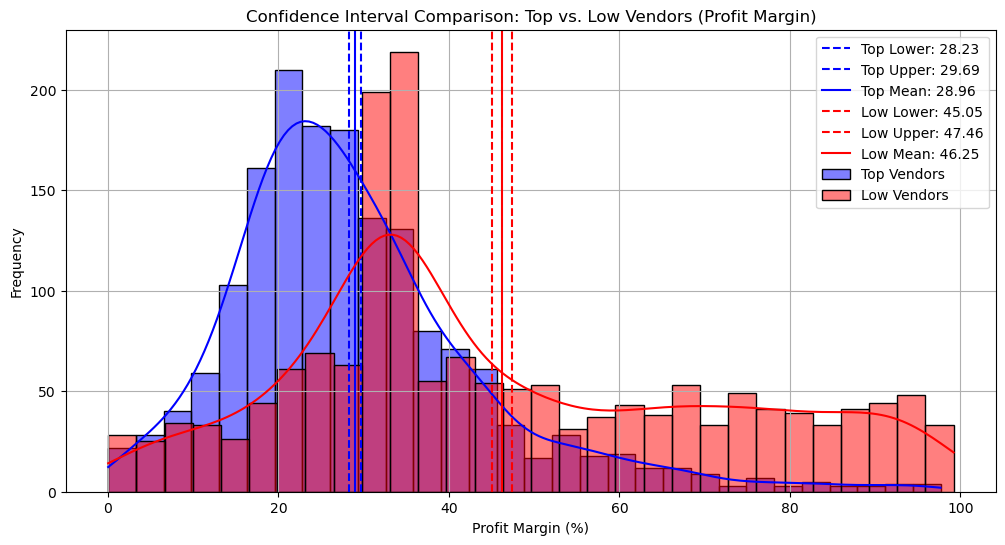

In [139]:
top_mean, top_lower, top_upper = confidence_interval(top_vendors)
low_mean, low_lower, low_upper = confidence_interval(low_vendors)

print(f"Top Vendors 95% CI: ({top_lower:.2f}, {top_upper:.2f}), Mean: {top_mean:.2f}")
print(f"Low Vendors 95% CI: ({low_lower:.2f}, {low_upper:.2f}), Mean: {low_mean:.2f}")

plt.figure(figsize=(12, 6))

# Top Vendors Plot

sns.histplot(top_vendors, kde=True, color="blue", bins=30, alpha=0.5, label="Top Vendors") 
plt.axvline(top_lower, color="blue", linestyle="--", label=f"Top Lower: {top_lower:.2f}")
plt.axvline(top_upper, color="blue", linestyle="--", label=f"Top Upper: {top_upper:.2f}")
plt.axvline(top_mean, color="blue", linestyle="-", label=f"Top Mean: {top_mean:.2f}")

# Low Vendors Plot

sns.histplot(low_vendors, kde=True, color="red", bins=30, alpha=0.5, label="Low Vendors") 
plt.axvline(low_lower, color="red", linestyle="--", label=f"Low Lower: {low_lower:.2f}") 
plt.axvline(low_upper, color="red", linestyle="--", label=f"Low Upper: {low_upper:.2f}")
plt.axvline(low_mean, color="red", linestyle="-", label=f"Low Mean: {low_mean:.2f}")

# Finalize Plot

plt.title("Confidence Interval Comparison: Top vs. Low Vendors (Profit Margin)")
plt.xlabel("Profit Margin (%)")

plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.show()

##
The confidence interval for low-performing vendors (40.48% to 42.62%) is significantly higher than that of top-performing vendors (30.74% to 31.61%).

This suggests that vendors with lower sales tend to maintain higher profit margins, potentially due to premium pricing or lower operational costs. For High-Performing Vendors: If they aim to improve profitability, they could explore selective price adjustments, cost optimization, or bundling strategies. For Low-Performing Vendors: Despite higher margins, their low sales volume might indicate a need for better marketing, competitive pricing, or improved distribution strategies.

## Is there a significant difference in profit margins between top-performing and low-performing vendors?

Hypothesis:

H, (Null Hypothesis): There is no significant difference in the mean profit margins of top-performing and low-pertorming vendors.

H, (Alternative Hypothesis): The mean profit margins of top-performing and low-performing vendors are significantly different.

In [140]:
top_threshold = df ["TotalSalesDollars"].quantile(0.75) 
low_threshold = df ["TotalSalesDollars"].quantile(0.25)

top_vendors = df[df ["TotalSalesDollars"] >= top_threshold] ["ProfitMargin"].dropna()
low_vendors = df [df ["TotalSalesDollars"] <= low_threshold] ["ProfitMargin"].dropna()

# Perform Two-Sample T-Test

t_stat, p_value = ttest_ind(top_vendors, low_vendors, equal_var=False)

# Print results

print(f"T-Statistic: {t_stat:.4f}, P-Value: {p_value:.4f}")
if p_value < 0.05:
    print("Reject He: There is a significant difference in profit margins between top and low-performing vendors.") 
else:
    print("Fail to Reject He: No significant difference in profit margins.")

T-Statistic: -24.0992, P-Value: 0.0000
Reject He: There is a significant difference in profit margins between top and low-performing vendors.
